In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("david-lee-d0rhs").project("american-sign-language-letters")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-Sign-Language-Letters-1 in yolov11:: 100%|██████████| 3468/3468 [00:00<00:00, 9495.96it/s]


In [2]:
import yaml

# Define the data configuration
data_config = {
    'train': '/content/American-Sign-Language-Letters-1/train/images',
    'val': '/content/American-Sign-Language-Letters-1/valid/images',
    'nc': 26,  # number of classes
    'names': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
}

# Write the configuration to a YAML file
with open('/content/American-Sign-Language-Letters-1/data.yaml', 'w') as file:
    yaml.dump(data_config, file)

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 56.8 MB/s eta 0:00:00


In [5]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/data.yaml epochs=25 batch=32 plots=True

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 222MB/s]
WARNING ⚠️ yolo11s.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 36.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to 


0: 640x640 1 Z, 9.5ms
Speed: 2.3ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


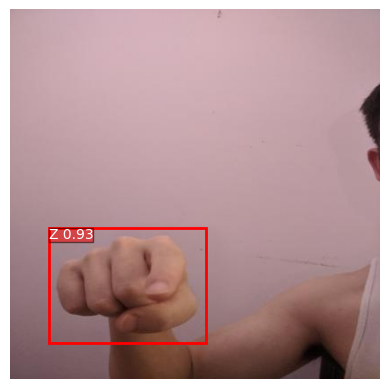

In [8]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import torch

# Load a model
model = YOLO(r"/content/runs/detect/train/weights/best.pt")  # pretrained YOLOv8n model

# Run batched inference on a list of images
image_path = r"/content/American-Sign-Language-Letters-1/test/images/Z16_jpg.rf.309328aaeb31736f8a93a570d6d4f140.jpg"
results = model([image_path])  # return a list of Results objects

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Define confidence threshold
confidence_threshold = 0.4

# Process results list
for result in results:
    # Filter boxes by confidence score
    filtered_boxes = [box for box in result.boxes if box.conf.item() >= confidence_threshold]

    # Open image
    img = Image.open(image_path)
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Plot filtered boxes
    for box in filtered_boxes:
        # Get box coordinates
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        width = x2 - x1
        height = y2 - y1

        # Get class index and confidence
        class_index = int(box.cls.item())
        class_name = class_names[class_index]  # Convert index to class name

        # Create a rectangle patch
        rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
        plt.text(x1, y1, f"{class_name} {box.conf.item():.2f}", color='white', verticalalignment='top', bbox=dict(facecolor='red', alpha=0.5, pad=0))

    plt.axis('off')
    plt.show()

    # Optional: Save the plot
    fig.savefig("result_filtered.jpg", bbox_inches='tight', pad_inches=0.0)
